#Loading and cleaning

Load the dataset using Pandas.
Perform basic data cleaning (handling missing values, incorrect data types, etc.).

In [ ]:
import pandas as pd
penguins_path = '/content/penguins.csv'
penguins = pd.read_csv(penguins_path)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [7]:
penguins.info()
# 344 rows, 8 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [9]:
penguins.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11
year,0


In [11]:
# Replace missing values with the mean for numerical columns
penguins['bill_length_mm'].fillna(penguins['bill_length_mm'].mean(), inplace=True)
penguins['bill_depth_mm'].fillna(penguins['bill_depth_mm'].mean(), inplace=True)
penguins['flipper_length_mm'].fillna(penguins['flipper_length_mm'].mean(), inplace=True)
penguins['body_mass_g'].fillna(penguins['body_mass_g'].mean(), inplace=True)

# Verify that there are no more missing values in these columns
penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].isnull().sum()


,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0


In [14]:
# Since sex is categorical and we only have 11 missing values, the best practice
# would likely be to replace the missing values with the most frequent value (mode).

penguins['sex'].fillna(penguins['sex'].mode()[0], inplace=True) #[0] = first mode value

# Verify that there are no more missing values in the 'sex' column
penguins['sex'].isnull().sum()


0

In [18]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


#Exploratory Data Analysis (EDA):

Use Pandas to summarize the key statistics of the dataset.
Identify unique values, ranges, and distribution of data.

In [19]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.443643,1.969027,14.020657,799.613058,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.275000,15.600000,190.000000,3550.000000,2007.000000
50%,44.250000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [20]:
# we can display uniue values for categorical columns only, not numerical
penguins.nunique()

,0
species,3
island,3
bill_length_mm,165
bill_depth_mm,81
flipper_length_mm,56
body_mass_g,95
sex,2
year,3


In [22]:
penguins['species'].unique(), penguins['island'].unique(), penguins['sex'].unique()

(array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object),
 array(['Torgersen', 'Biscoe', 'Dream'], dtype=object),
 array(['male', 'female'], dtype=object))

In [24]:
# Select only numerical columns for correlation
numerical_columns = penguins.select_dtypes(include=['float64', 'int64'])

# Generate a correlation matrix for numerical columns
correlation_matrix = numerical_columns.corr()

# Display the correlation matrix
correlation_matrix


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.235053,0.656181,0.595110,0.054306
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916,-0.060090
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202,0.168934
body_mass_g,0.595110,-0.471916,0.871202,1.000000,0.042025
year,0.054306,-0.060090,0.168934,0.042025,1.000000


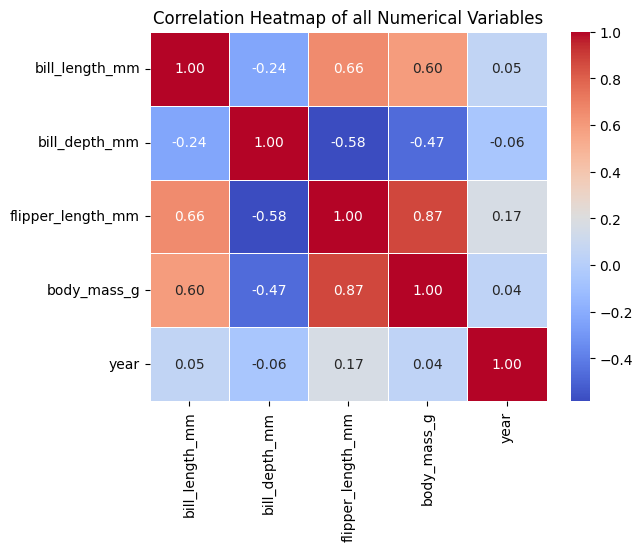

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize the correlation matrix

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap of all Numerical Variables')

plt.show()


To understand the distribution of penguins across species, island, and sex, we’ll count the number of entries in each category.

In [27]:
# Count the number of penguins in each species
species_count = penguins['species'].value_counts()

# Count the number of penguins on each island
island_count = penguins['island'].value_counts()

# Count the distribution of penguins by sex
sex_count = penguins['sex'].value_counts()

species_count, island_count, sex_count


(species
 Adelie       152
 Gentoo       124
 Chinstrap     68
 Name: count, dtype: int64,
 island
 Biscoe       168
 Dream        124
 Torgersen     52
 Name: count, dtype: int64,
 sex
 male      179
 female    165
 Name: count, dtype: int64)

#Visualization tasks


Species Distribution: Use a bar chart to show the distribution of penguin species.

<ipython-input-53-ef53aea149f6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=penguins, x='species', palette='Set2')


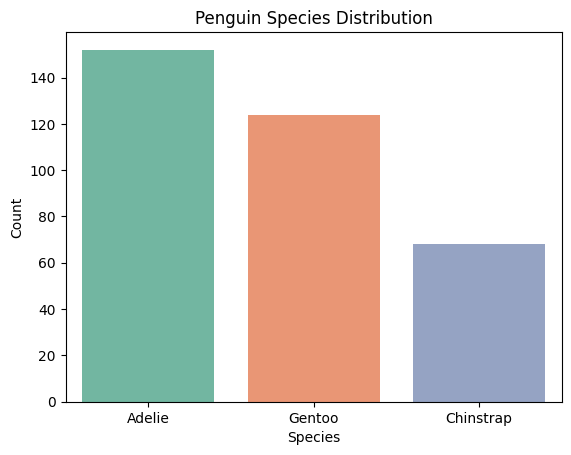

In [53]:
sns.countplot(data=penguins, x='species', palette='Set2')

# Add a title and labels for clarity
plt.title('Penguin Species Distribution')
plt.xlabel('Species')
plt.ylabel('Count')

plt.show()

Flipper Length vs. Body Mass: Create a scatter plot to analyze the relationship between flipper length and body mass, color-coded by species.

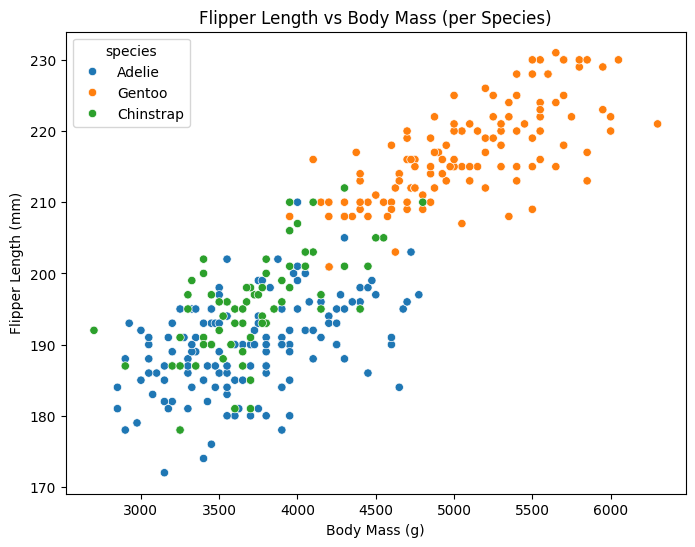

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=penguins, y='flipper_length_mm', x='body_mass_g', hue='species')

# Add a title and labels
plt.title('Flipper Length vs Body Mass (per Species)')
plt.ylabel('Flipper Length (mm)')
plt.xlabel('Body Mass (g)')

plt.show()


Island Distribution: Visualize the count of penguins on each island using a pie chart.

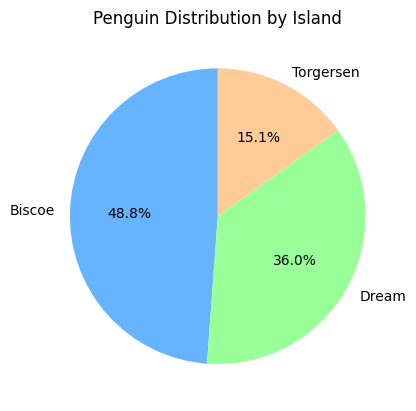

In [52]:
# FIRS WE NEED DISRIBUTION so we will have what to plot
island_distribution = penguins['island'].value_counts()
island_distribution

island_distribution.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])

plt.title('Penguin Distribution by Island')

# Remove the y-label for aesthetics, not needed
plt.ylabel('')

plt.show()

Sex Distribution within Species: Create grouped bar charts showing the distribution of sex within each penguin species.


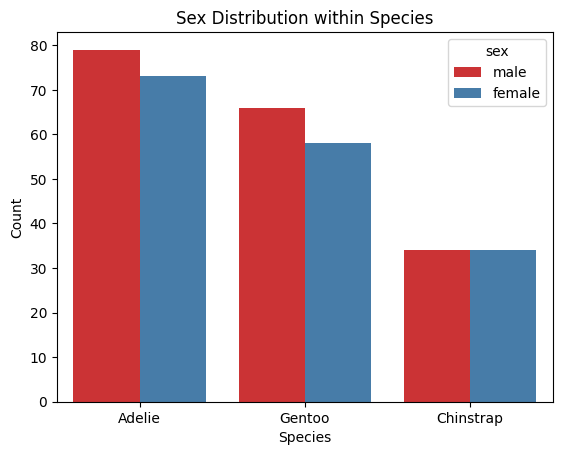

In [51]:
sns.countplot(data=penguins, x='species', hue='sex', palette='Set1')

# Add a title and labels
plt.title('Sex Distribution within Species')
plt.xlabel('Species')
plt.ylabel('Count')

plt.show()

Heatmap of Correlations: Plot a heatmap to visualize the correlations between numerical variables.

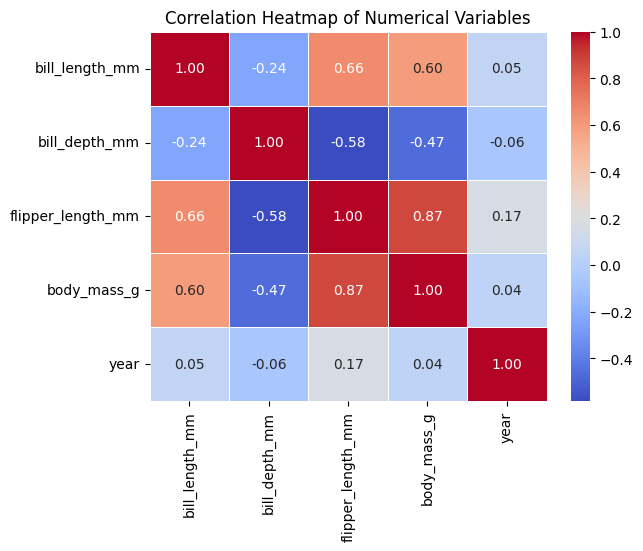

In [54]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap of Numerical Variables')

# Show the plot
plt.show()

Boxplots for Measurements: Generate boxplots for flipper length, body mass, and bill measurements, segmented by species.


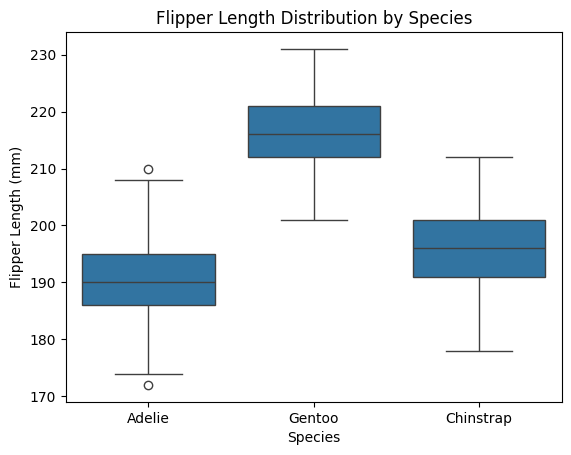

In [57]:
sns.boxplot(data=penguins, x='species', y='flipper_length_mm')

# Add a title and labels
plt.title('Flipper Length Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Flipper Length (mm)')

# Show the plot
plt.show()


In [59]:
# Filter the dataset for rows where the species is 'Adelie'
adelie_penguins = penguins[penguins['species'] == 'Adelie']

# Display the .describe for the filtered dataset
adelie_penguins.describe()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,152.000000,152.000000,152.000000,152.000000,152.000000
mean,38.825144,18.338495,190.025758,3703.958910,2008.013158
std,2.686991,1.216483,6.578130,458.848798,0.821780
min,32.100000,15.500000,172.000000,2850.000000,2007.000000
25%,36.775000,17.475000,186.000000,3350.000000,2007.000000
50%,38.800000,18.400000,190.000000,3700.000000,2008.000000
75%,40.800000,19.000000,195.000000,4000.000000,2009.000000
max,46.000000,21.500000,210.000000,4775.000000,2009.000000


In [63]:
# Check the minimum flipper length in the Adelie penguins dataset
adelie_penguins['flipper_length_mm'].min()




172.0

Histograms of Measurements: Create histograms to show the distribution of key measurements (bill length, bill depth, flipper length).

We can display histograms one by one or side by side (without overlapping)

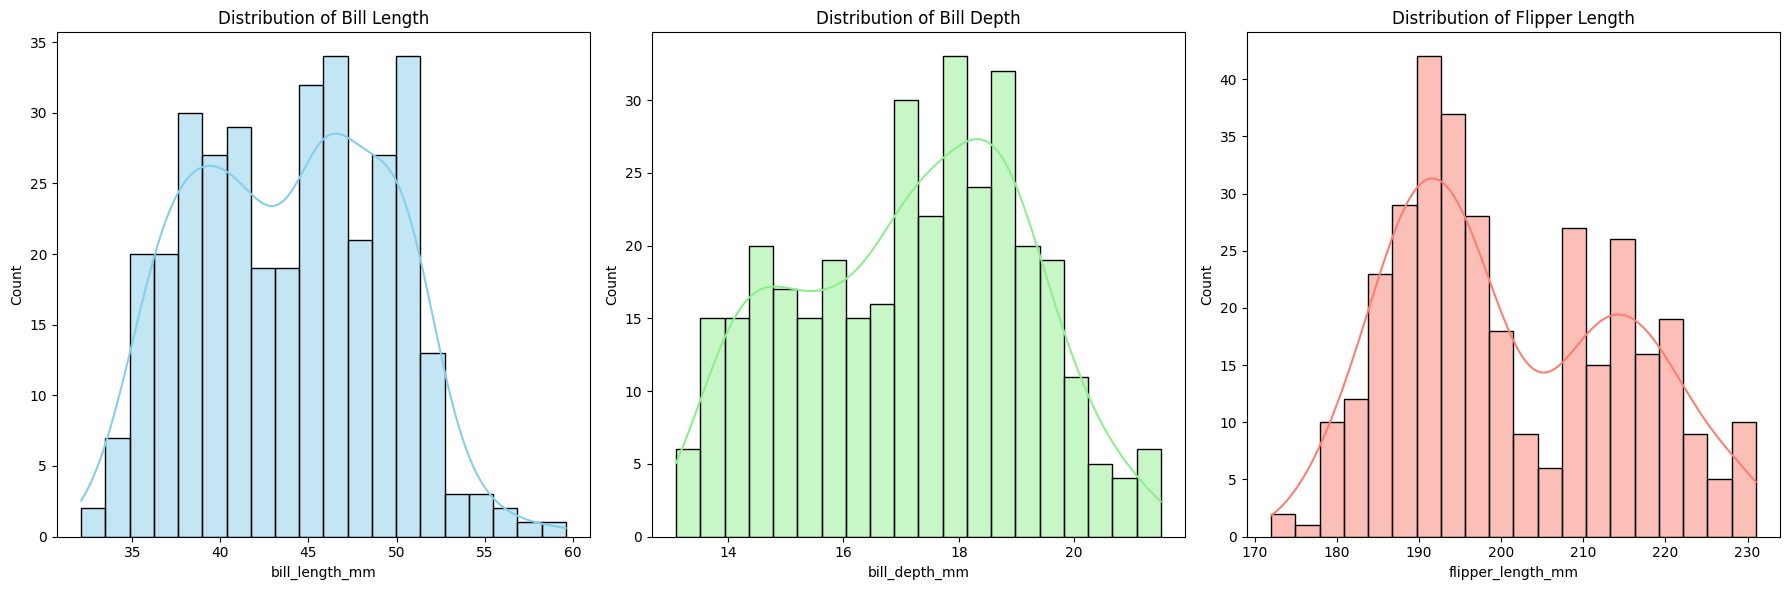

In [64]:
# Create subplots for multiple histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Histogram for bill length
sns.histplot(data=penguins, x='bill_length_mm', kde=True, bins=20, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Bill Length')

# Histogram for bill depth
sns.histplot(data=penguins, x='bill_depth_mm', kde=True, bins=20, color='lightgreen', ax=axes[1])
axes[1].set_title('Distribution of Bill Depth')

# Histogram for flipper length
sns.histplot(data=penguins, x='flipper_length_mm', kde=True, bins=20, color='salmon', ax=axes[2])
axes[2].set_title('Distribution of Flipper Length')

plt.tight_layout()
plt.show()



##Insightful Visualizations:

Combine multiple plots into a single figure (using subplots) to compare different aspects of the data.

We can overlay histograms. This can be useful when you want to compare the shapes of distributions directly, but it may get crowded if there are too many variables or if the distributions overlap too much.

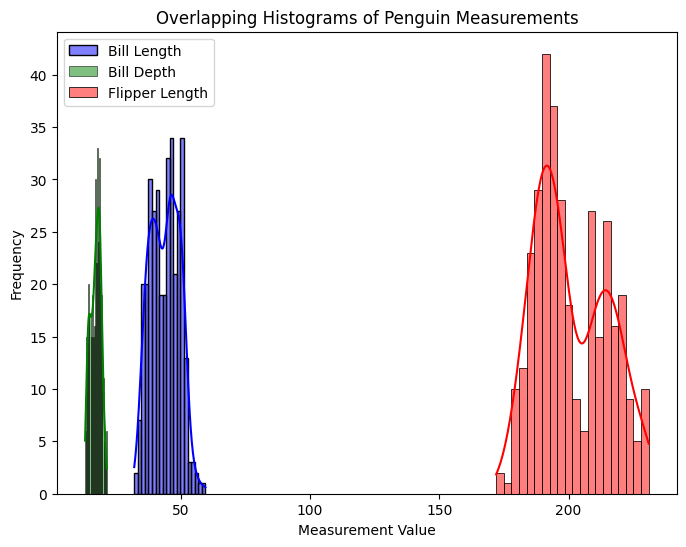

In [65]:
# Overlaying multiple histograms on the same plot
plt.figure(figsize=(8, 6))

# Bill length
sns.histplot(data=penguins, x='bill_length_mm', kde=True, bins=20, color='blue', label='Bill Length', alpha=0.5)

# Bill depth
sns.histplot(data=penguins, x='bill_depth_mm', kde=True, bins=20, color='green', label='Bill Depth', alpha=0.5)

# Flipper length
sns.histplot(data=penguins, x='flipper_length_mm', kde=True, bins=20, color='red', label='Flipper Length', alpha=0.5)

# Add legend and labels
plt.title('Overlapping Histograms of Penguin Measurements')
plt.xlabel('Measurement Value')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


Using Different Colors and hue in Seaborn (Grouped Histograms)

Here, we use Seaborn’s hue parameter to group and color the data by a categorical variable (e.g., species) within the same histogram. This is good for comparing how a numerical variable is distributed across different categories.

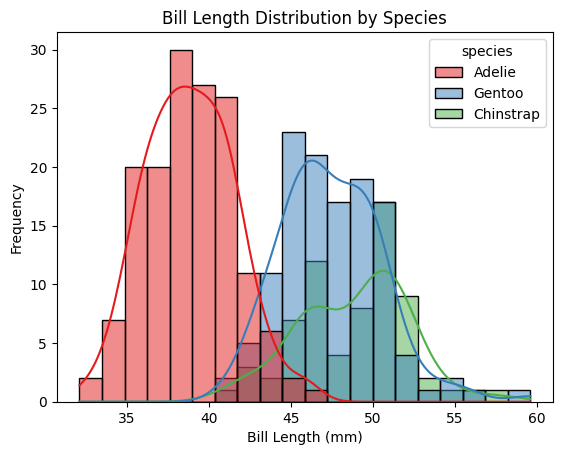

In [68]:

sns.histplot(data=penguins, x='bill_length_mm', kde=True, hue='species', bins=20, palette='Set1', alpha=0.5)

# Add title and labels
plt.title('Bill Length Distribution by Species')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Frequency')

# Show the plot
plt.show()


. Facet Grids for Multiple Histograms (Using Seaborn’s FacetGrid):

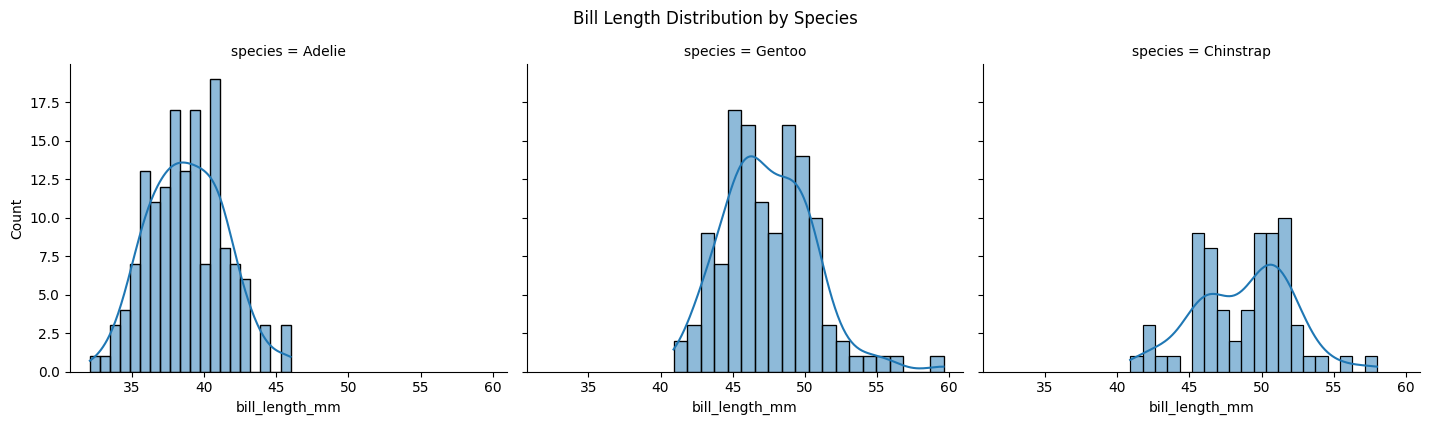

In [69]:
# Facet grid for bill length by species
g = sns.FacetGrid(penguins, col="species", margin_titles=True, height=4, aspect=1.2)
g.map(sns.histplot, "bill_length_mm", bins=20, kde=True)

# Add a title for the whole plot
g.fig.suptitle('Bill Length Distribution by Species', y=1.05)

plt.show()


JOINPLOT of SEABORN

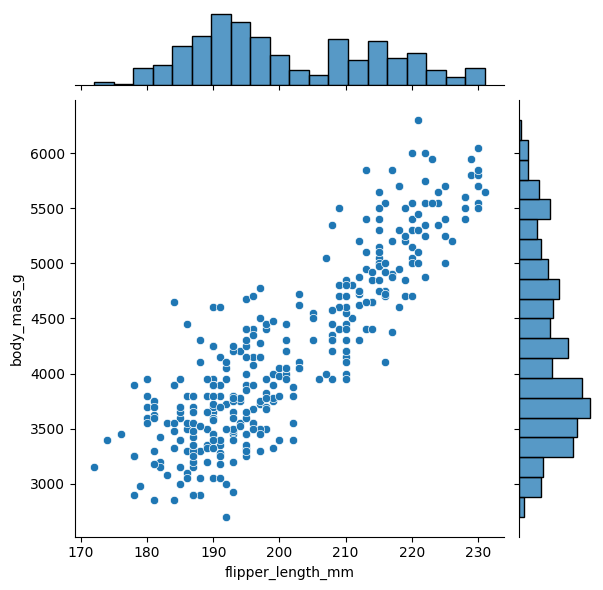

In [71]:
# Create a scatter plot of flipper length vs body mass with histograms on the margins
sns.jointplot(data=penguins, x='flipper_length_mm', y='body_mass_g', kind='scatter', marginal_kws=dict(bins=20, fill=True))

# Show the plot
plt.show()



You can also replace the histograms with Kernel Density Estimation (KDE) on the margins, which gives a smoother view of the distributions.ALSO you can use hexagrams.

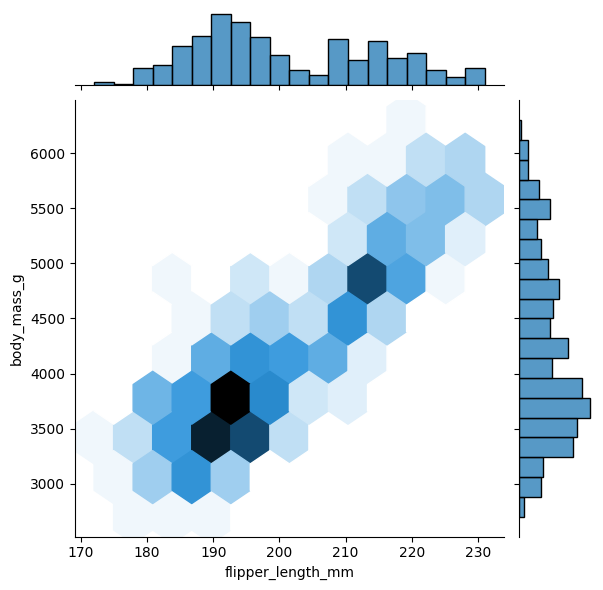

In [75]:
# Hexbin plot with histograms on the margins
sns.jointplot(data=penguins, x='flipper_length_mm', y='body_mass_g', kind='hex', marginal_kws=dict(bins=20, fill=True))

plt.show()


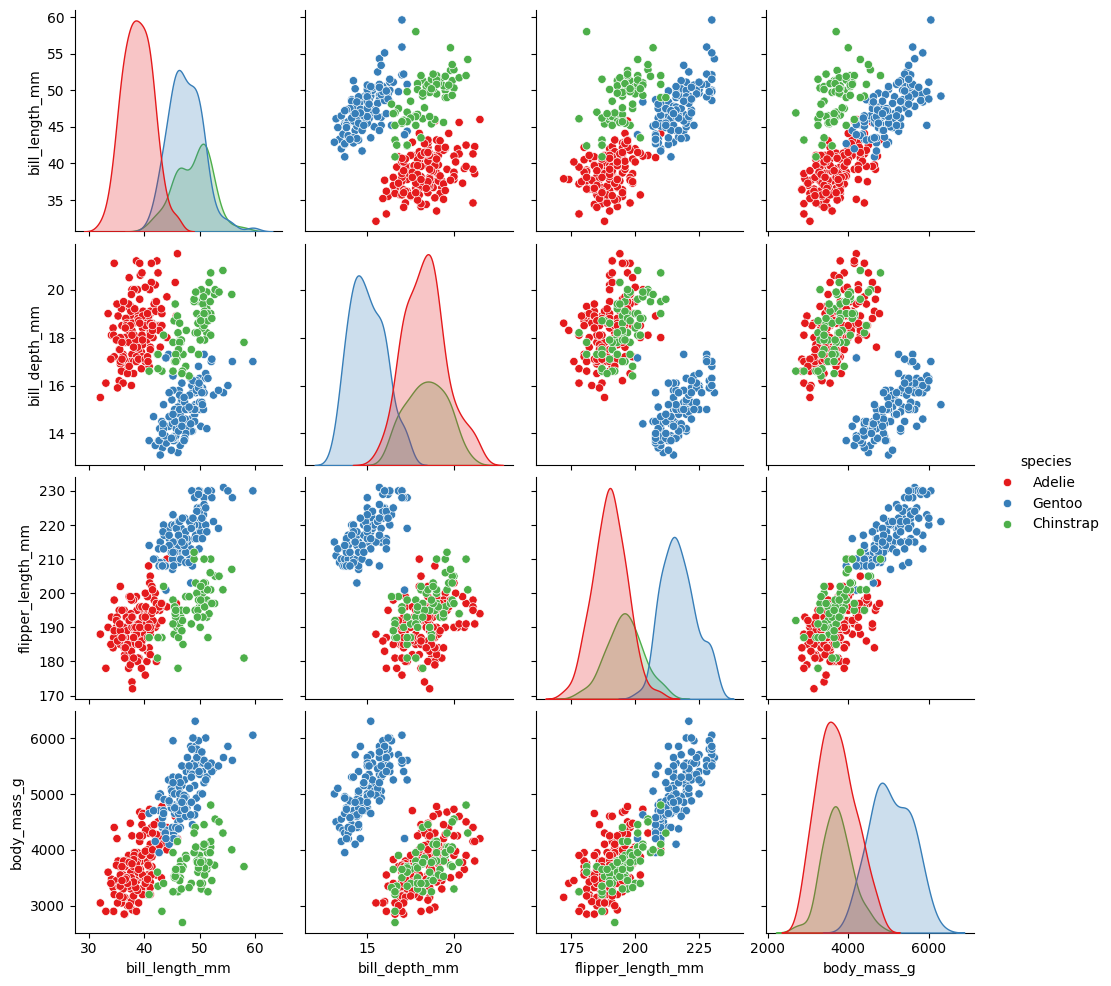

In [77]:
# Pairplot to visualize pairwise relationships between numerical variables, colored by species

# Select the relevant columns excluding 'year'
penguins_filtered = penguins.drop(columns=['year'])

# Pairplot to visualize pairwise relationships between numerical variables, excluding 'year'
sns.pairplot(penguins_filtered, hue='species', diag_kind='kde', palette='Set1')

plt.show()
